

# Pandas


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


KeyboardInterrupt: ignored

In [3]:
# import 

import pandas as pd
import datetime as dttm
import numpy as np
from matplotlib import pyplot as plt

# 기본 자료 구조 및 method

In [ ]:
# Series 생성

pd.Series({'student_id': [0,1,2,3,4]})

student_id    [0, 1, 2, 3, 4]
dtype: object

In [ ]:
# DataFrame 생성

data = {
    'student_id': list(range(5)),
    'eng_score': np.random.randint(0,100, (5)),
    'math_score': np.random.randint(0,100, (5))
}

pd.DataFrame(data)

,student_id,eng_score,math_score
0,0,77,60
1,1,47,24
2,2,97,14
3,3,18,35
4,4,74,74


In [ ]:
# Series & DataFrame 기초 method

df_score = pd.DataFrame(data)

# index
df_score.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
# columns
df_score.columns

Index(['student_id', 'eng_score', 'math_score'], dtype='object')

In [ ]:
# values
df_score.values

array([[ 0, 77, 60],
       [ 1, 47, 24],
       [ 2, 97, 14],
       [ 3, 18, 35],
       [ 4, 74, 74]])

In [ ]:
# dtypes
df_score.dtypes

student_id    int64
eng_score     int64
math_score    int64
dtype: object

In [ ]:
# 특정 column 조회
df_score['eng_score']

0    77
1    47
2    97
3    18
4    74
Name: eng_score, dtype: int64

In [ ]:
# 새로운 column 생성
df_score['science_score'] = [40,40,50,60,80]
df_score

,student_id,eng_score,math_score,science_score
0,0,77,60,40
1,1,47,24,40
2,2,97,14,50
3,3,18,35,60
4,4,74,74,80


# 파일 불러오기 및 결측치 처리

In [ ]:
# read csv
# 공모전용 파일이라 배포가 불가능합니다
# dtype test용이니 신경 안쓰셔도 됩니당 ㅎㅎ 
test = pd.read_csv('/content/drive/My Drive/kaggle_ashrae/test.csv')

In [ ]:
# read Excel

xlsx = pd.ExcelFile('/content/drive/My Drive/education/config_.xlsx')
sheet1 = pd.read_excel(xlsx, 'Sheet1')
sheet1

,아티스트,Unnamed: 1,곡,Unnamed: 3,보컬,기타,기타2,베이스,드럼,키보드,미디,장르
0,검정치마,NaN,내 고향 서울엔,NaN,member0,member12,NaN,member13,member3,NaN,member16,Pop / Rock
1,Rage Against The Machine,NaN,Sleep Now In The Fire,NaN,member0,member7,member12,member1,member9,NaN,NaN,Metal / Rock
2,스키조,NaN,Bomb! Bomb! Bomb!,NaN,member0,member12,NaN,member13,member9,NaN,member16,Metal / Rock
3,솔루션스,NaN,Oh Yeah,NaN,member0,member6,member7,member1,member18,member2,member16,Electronica / Rock
4,Every Little Thing,NaN,Grip!!,NaN,member5,member6,member12,member8,member4,member2,member16,J-Rock
5,새소년,NaN,고양이,NaN,member5,member11,NaN,member8,member9,NaN,NaN,Lofi / Indie
6,백예린,NaN,Square,NaN,member5,member6,NaN,member1,member18,member2,member16,Pop / Indie
7,DAY6,NaN,한 페이지가 될 수 있게 (앵콜),NaN,member19,member12,member6,member8,member18,member2,NaN,Pop / Rock
8,Play That K-Pop or 소녀시대,NaN,다시만난세계,NaN,member5,member11,member12,member8,member4,member2,NaN,K-Pop
9,Tones And I,NaN,Dance Monkey,NaN,member10,member6,NaN,member8,NaN,NaN,NaN,Pop


In [ ]:
# read Excel

xlsx = pd.ExcelFile('/content/drive/My Drive/education/config_.xlsx')
sheet1 = pd.read_excel(xlsx, 'Sheet1')
sheet2 = pd.read_excel(xlsx, 'Sheet2')

In [ ]:
# Dtype

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   row_id       int64 
 1   building_id  int64 
 2   meter        int64 
 3   timestamp    object
dtypes: int64(3), object(1)
memory usage: 1.2+ GB


In [ ]:
test.dtypes

row_id          int64
building_id     int64
meter           int64
timestamp      object
dtype: object

In [ ]:
test['row_id'].nunique(), test['building_id'].nunique(), test['meter'].nunique()

(41697600, 1449, 4)

In [ ]:
data_dtype = {'building_id' : np.int16, 'meter': np.int8}
test = pd.read_csv('/content/drive/My Drive/kaggle_ashrae/test.csv', dtype = data_dtype)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   row_id       int64 
 1   building_id  int16 
 2   meter        int8  
 3   timestamp    object
dtypes: int16(1), int64(1), int8(1), object(1)
memory usage: 755.6+ MB


In [ ]:
sheet1.isna()

,아티스트,Unnamed: 1,곡,Unnamed: 3,보컬,기타,기타2,베이스,드럼,키보드,미디,장르
0,False,True,False,True,False,False,True,False,False,True,False,False
1,False,True,False,True,False,False,False,False,False,True,True,False
2,False,True,False,True,False,False,True,False,False,True,False,False
3,False,True,False,True,False,False,False,False,False,False,False,False
4,False,True,False,True,False,False,False,False,False,False,False,False
5,False,True,False,True,False,False,True,False,False,True,True,False
6,False,True,False,True,False,False,True,False,False,False,False,False
7,False,True,False,True,False,False,False,False,False,False,True,False
8,False,True,False,True,False,False,False,False,False,False,True,False
9,False,True,False,True,False,False,True,False,True,True,True,False


In [ ]:
# 결측치 확인 및 제거

# 결측치 비율
sheet1.isna().sum() / len(sheet1)

아티스트          0.000000
Unnamed: 1    1.000000
곡             0.000000
Unnamed: 3    1.000000
보컬            0.000000
기타            0.000000
기타2           0.368421
베이스           0.000000
드럼            0.052632
키보드           0.473684
미디            0.526316
장르            0.000000
dtype: float64

In [ ]:
# fillna
sheet1_fillna = sheet1.fillna("")
sheet1_fillna.isna().sum() / len(sheet1_fillna)

아티스트          0.0
Unnamed: 1    0.0
곡             0.0
Unnamed: 3    0.0
보컬            0.0
기타            0.0
기타2           0.0
베이스           0.0
드럼            0.0
키보드           0.0
미디            0.0
장르            0.0
dtype: float64

In [ ]:
sheet1

,아티스트,Unnamed: 1,곡,Unnamed: 3,보컬,기타,기타2,베이스,드럼,키보드,미디,장르
0,검정치마,NaN,내 고향 서울엔,NaN,member0,member12,NaN,member13,member3,NaN,member16,Pop / Rock
1,Rage Against The Machine,NaN,Sleep Now In The Fire,NaN,member0,member7,member12,member1,member9,NaN,NaN,Metal / Rock
2,스키조,NaN,Bomb! Bomb! Bomb!,NaN,member0,member12,NaN,member13,member9,NaN,member16,Metal / Rock
3,솔루션스,NaN,Oh Yeah,NaN,member0,member6,member7,member1,member18,member2,member16,Electronica / Rock
4,Every Little Thing,NaN,Grip!!,NaN,member5,member6,member12,member8,member4,member2,member16,J-Rock
5,새소년,NaN,고양이,NaN,member5,member11,NaN,member8,member9,NaN,NaN,Lofi / Indie
6,백예린,NaN,Square,NaN,member5,member6,NaN,member1,member18,member2,member16,Pop / Indie
7,DAY6,NaN,한 페이지가 될 수 있게 (앵콜),NaN,member19,member12,member6,member8,member18,member2,NaN,Pop / Rock
8,Play That K-Pop or 소녀시대,NaN,다시만난세계,NaN,member5,member11,member12,member8,member4,member2,NaN,K-Pop
9,Tones And I,NaN,Dance Monkey,NaN,member10,member6,NaN,member8,NaN,NaN,NaN,Pop


In [ ]:
# dropna
sheet1_dropna = sheet1.dropna()
sheet1_dropna

,아티스트,Unnamed: 1,곡,Unnamed: 3,보컬,기타,기타2,베이스,드럼,키보드,미디,장르


In [ ]:
sheet1.dropna(axis = 0)

,아티스트,Unnamed: 1,곡,Unnamed: 3,보컬,기타,기타2,베이스,드럼,키보드,미디,장르


In [ ]:
sheet1.dropna(axis = 1)

,아티스트,곡,보컬,기타,베이스,장르
0,검정치마,내 고향 서울엔,member0,member12,member13,Pop / Rock
1,Rage Against The Machine,Sleep Now In The Fire,member0,member7,member1,Metal / Rock
2,스키조,Bomb! Bomb! Bomb!,member0,member12,member13,Metal / Rock
3,솔루션스,Oh Yeah,member0,member6,member1,Electronica / Rock
4,Every Little Thing,Grip!!,member5,member6,member8,J-Rock
5,새소년,고양이,member5,member11,member8,Lofi / Indie
6,백예린,Square,member5,member6,member1,Pop / Indie
7,DAY6,한 페이지가 될 수 있게 (앵콜),member19,member12,member8,Pop / Rock
8,Play That K-Pop or 소녀시대,다시만난세계,member5,member11,member8,K-Pop
9,Tones And I,Dance Monkey,member10,member6,member8,Pop


In [ ]:
 sheet1.dropna(axis = 1, how = 'all')

,아티스트,곡,보컬,기타,기타2,베이스,드럼,키보드,미디,장르
0,검정치마,내 고향 서울엔,member0,member12,NaN,member13,member3,NaN,member16,Pop / Rock
1,Rage Against The Machine,Sleep Now In The Fire,member0,member7,member12,member1,member9,NaN,NaN,Metal / Rock
2,스키조,Bomb! Bomb! Bomb!,member0,member12,NaN,member13,member9,NaN,member16,Metal / Rock
3,솔루션스,Oh Yeah,member0,member6,member7,member1,member18,member2,member16,Electronica / Rock
4,Every Little Thing,Grip!!,member5,member6,member12,member8,member4,member2,member16,J-Rock
5,새소년,고양이,member5,member11,NaN,member8,member9,NaN,NaN,Lofi / Indie
6,백예린,Square,member5,member6,NaN,member1,member18,member2,member16,Pop / Indie
7,DAY6,한 페이지가 될 수 있게 (앵콜),member19,member12,member6,member8,member18,member2,NaN,Pop / Rock
8,Play That K-Pop or 소녀시대,다시만난세계,member5,member11,member12,member8,member4,member2,NaN,K-Pop
9,Tones And I,Dance Monkey,member10,member6,NaN,member8,NaN,NaN,NaN,Pop


In [ ]:
df = pd.concat([sheet1, sheet1.iloc[15:17,:]], axis = 0).reset_index(drop = True)

In [ ]:
df

,아티스트,Unnamed: 1,곡,Unnamed: 3,보컬,기타,기타2,베이스,드럼,키보드,미디,장르
0,검정치마,NaN,내 고향 서울엔,NaN,member0,member12,NaN,member13,member3,NaN,member16,Pop / Rock
1,Rage Against The Machine,NaN,Sleep Now In The Fire,NaN,member0,member7,member12,member1,member9,NaN,NaN,Metal / Rock
2,스키조,NaN,Bomb! Bomb! Bomb!,NaN,member0,member12,NaN,member13,member9,NaN,member16,Metal / Rock
3,솔루션스,NaN,Oh Yeah,NaN,member0,member6,member7,member1,member18,member2,member16,Electronica / Rock
4,Every Little Thing,NaN,Grip!!,NaN,member5,member6,member12,member8,member4,member2,member16,J-Rock
5,새소년,NaN,고양이,NaN,member5,member11,NaN,member8,member9,NaN,NaN,Lofi / Indie
6,백예린,NaN,Square,NaN,member5,member6,NaN,member1,member18,member2,member16,Pop / Indie
7,DAY6,NaN,한 페이지가 될 수 있게 (앵콜),NaN,member19,member12,member6,member8,member18,member2,NaN,Pop / Rock
8,Play That K-Pop or 소녀시대,NaN,다시만난세계,NaN,member5,member11,member12,member8,member4,member2,NaN,K-Pop
9,Tones And I,NaN,Dance Monkey,NaN,member10,member6,NaN,member8,NaN,NaN,NaN,Pop


In [ ]:
df.drop_duplicates()

,아티스트,Unnamed: 1,곡,Unnamed: 3,보컬,기타,기타2,베이스,드럼,키보드,미디,장르
0,검정치마,NaN,내 고향 서울엔,NaN,member0,member12,NaN,member13,member3,NaN,member16,Pop / Rock
1,Rage Against The Machine,NaN,Sleep Now In The Fire,NaN,member0,member7,member12,member1,member9,NaN,NaN,Metal / Rock
2,스키조,NaN,Bomb! Bomb! Bomb!,NaN,member0,member12,NaN,member13,member9,NaN,member16,Metal / Rock
3,솔루션스,NaN,Oh Yeah,NaN,member0,member6,member7,member1,member18,member2,member16,Electronica / Rock
4,Every Little Thing,NaN,Grip!!,NaN,member5,member6,member12,member8,member4,member2,member16,J-Rock
5,새소년,NaN,고양이,NaN,member5,member11,NaN,member8,member9,NaN,NaN,Lofi / Indie
6,백예린,NaN,Square,NaN,member5,member6,NaN,member1,member18,member2,member16,Pop / Indie
7,DAY6,NaN,한 페이지가 될 수 있게 (앵콜),NaN,member19,member12,member6,member8,member18,member2,NaN,Pop / Rock
8,Play That K-Pop or 소녀시대,NaN,다시만난세계,NaN,member5,member11,member12,member8,member4,member2,NaN,K-Pop
9,Tones And I,NaN,Dance Monkey,NaN,member10,member6,NaN,member8,NaN,NaN,NaN,Pop


# 자료형태 변경

In [ ]:
# 불러오기
df_class = pd.read_csv('/content/drive/My Drive/education/df_class.csv')

In [ ]:
df_class.head()

,date,student_id,eng_score,math_score
0,2020-01-01,0,40,63
1,2020-01-01,1,65,21
2,2020-01-01,2,61,61
3,2020-01-01,3,89,91
4,2020-01-01,4,72,54


In [ ]:
df_class.dtypes

date          object
student_id     int64
eng_score      int64
math_score     int64
dtype: object

In [ ]:
# 날짜형 데이터로 변환

df_class['date'] = pd.to_datetime(df_class['date'])
df_class.dtypes

date          datetime64[ns]
student_id             int64
eng_score              int64
math_score             int64
dtype: object

In [ ]:
# dt method
df_class['month'] = df_class['date'].dt.month
df_class['day'] = df_class['date'].dt.day
df_class['weekday'] = df_class['date'].dt.weekday

df_class.head()

,date,student_id,eng_score,math_score,month,day,weekday
0,2020-01-01,0,40,63,1,1,2
1,2020-01-01,1,65,21,1,1,2
2,2020-01-01,2,61,61,1,1,2
3,2020-01-01,3,89,91,1,1,2
4,2020-01-01,4,72,54,1,1,2


In [ ]:
# type 변경

df_class['student_id'] = df_class['student_id'].astype(float)
print(df_class['student_id'][0])
df_class['student_id'] = df_class['student_id'].astype(int)
print(df_class['student_id'][0])
df_class['student_id'] = df_class['student_id'].astype(str)
print(df_class['student_id'][0])

0.0
0
0


In [ ]:
# 현재 문자형이기 때문에 보이기에는 0이어도 연산이 안됨
df_class['student_id'][0] + 1

TypeError: ignored

In [ ]:
# drop
df_class.drop(['month', 'day','weekday'], axis = 1).head()

,date,student_id,eng_score,math_score
0,2020-01-01,0,40,63
1,2020-01-01,1,65,21
2,2020-01-01,2,61,61
3,2020-01-01,3,89,91
4,2020-01-01,4,72,54


In [ ]:
df_class = df_class.drop(['month', 'day','weekday'], axis = 1)

In [ ]:
df_class

,date,student_id,eng_score,math_score
0,2020-01-01,0,40,63
1,2020-01-01,1,65,21
2,2020-01-01,2,61,61
3,2020-01-01,3,89,91
4,2020-01-01,4,72,54
5,2020-01-01,5,59,48
6,2020-01-01,6,63,63
7,2020-01-01,7,77,68
8,2020-01-02,0,5,88
9,2020-01-02,1,62,83


In [ ]:
# concat
# 적당한 데이터 생성
science_score = pd.DataFrame( {'science_score': np.random.randint(0,100,(len(df_class)))})

In [ ]:
# concat
pd.concat([df_class, science_score], axis = 1).head()

,date,student_id,eng_score,math_score,science_score
0,2020-01-01,0,40,63,84
1,2020-01-01,1,65,21,25
2,2020-01-01,2,61,61,72
3,2020-01-01,3,89,91,23
4,2020-01-01,4,72,54,86


In [ ]:
df_class = pd.concat([df_class, science_score], axis = 1)

# 이동평균

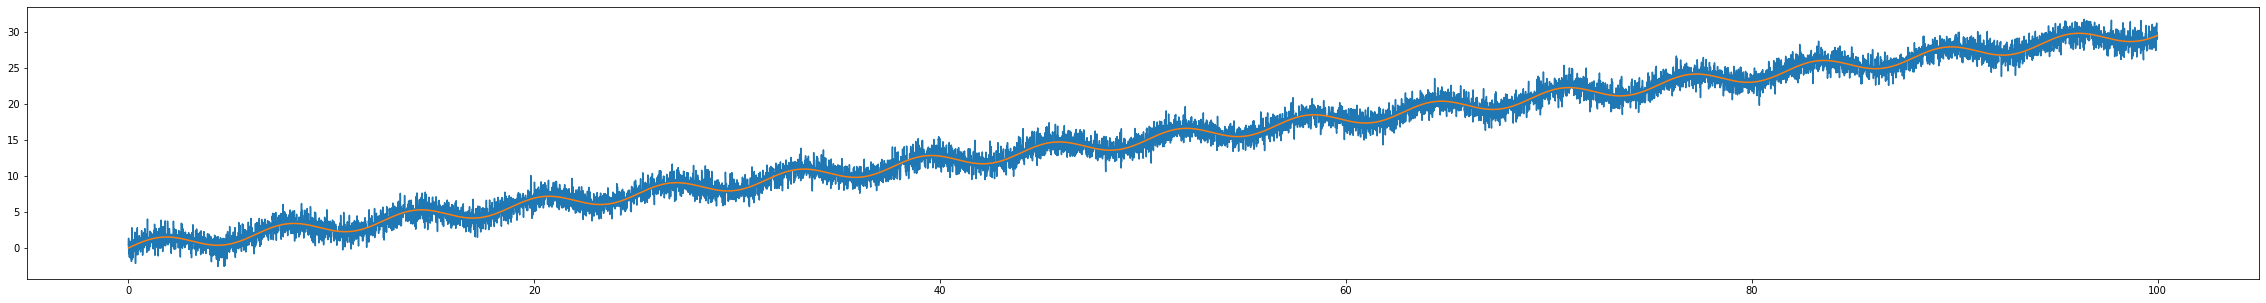

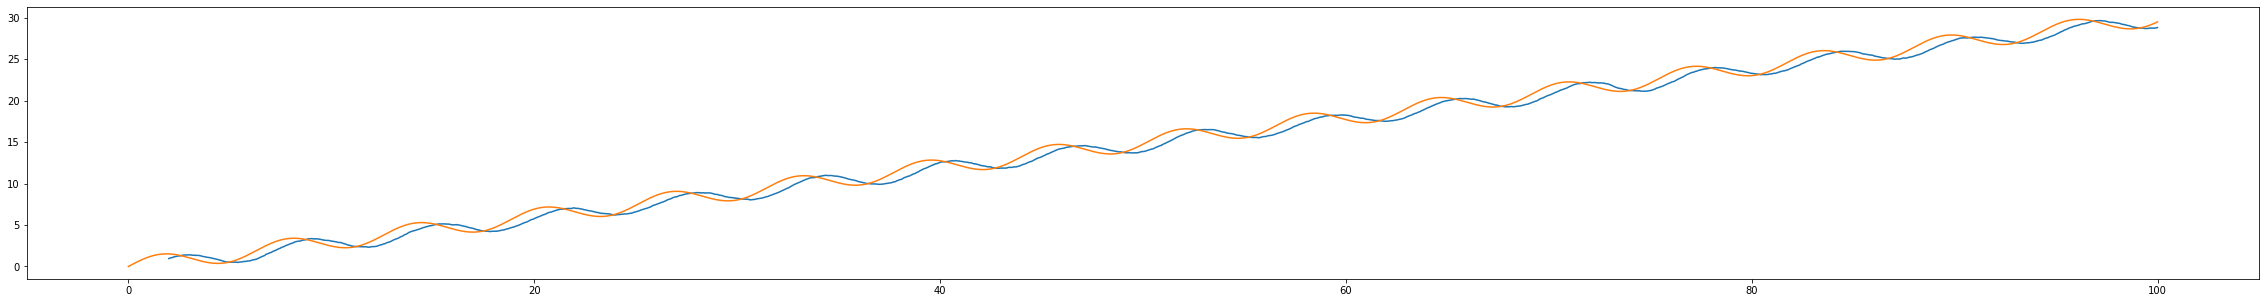

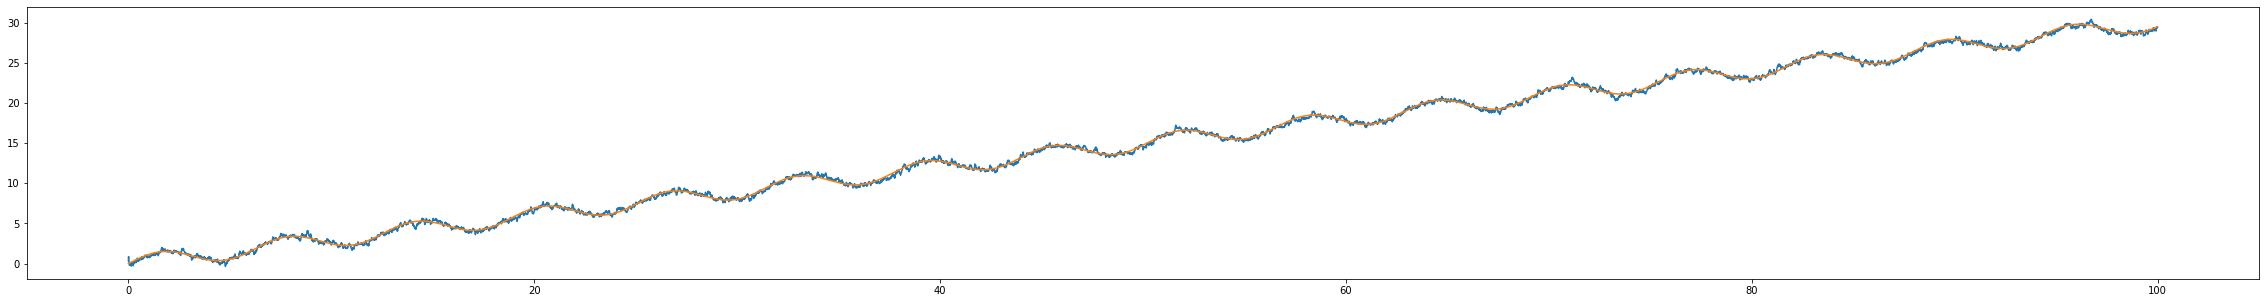

In [29]:
df_ma = pd.DataFrame({'x': np.array(list(range(10000))) * 0.01 })

df_ma['y'] = df_ma['x'].apply(lambda x: 0.3 * x + np.sin(x))

df_ma['y_noised'] = df_ma['y'] + pd.Series(np.random.normal(scale= 1, size = 10000))

df_ma['moving_average'] = df_ma.rolling(200).mean()['y_noised']
df_ma['exponential_weighted'] = df_ma.ewm(alpha = 0.1).mean()['y_noised']

plt.figure(figsize= (40, 5))
plt.plot(df_ma['x'], df_ma['y_noised'])
plt.plot(df_ma['x'], df_ma['y'])
plt.show()
plt.figure(figsize= (40, 5))

plt.plot(df_ma['x'], df_ma['moving_average'])
plt.plot(df_ma['x'], df_ma['y'])

plt.show()
plt.figure(figsize= (40, 5))

plt.plot(df_ma['x'], df_ma['exponential_weighted'])
plt.plot(df_ma['x'], df_ma['y'])
plt.show()

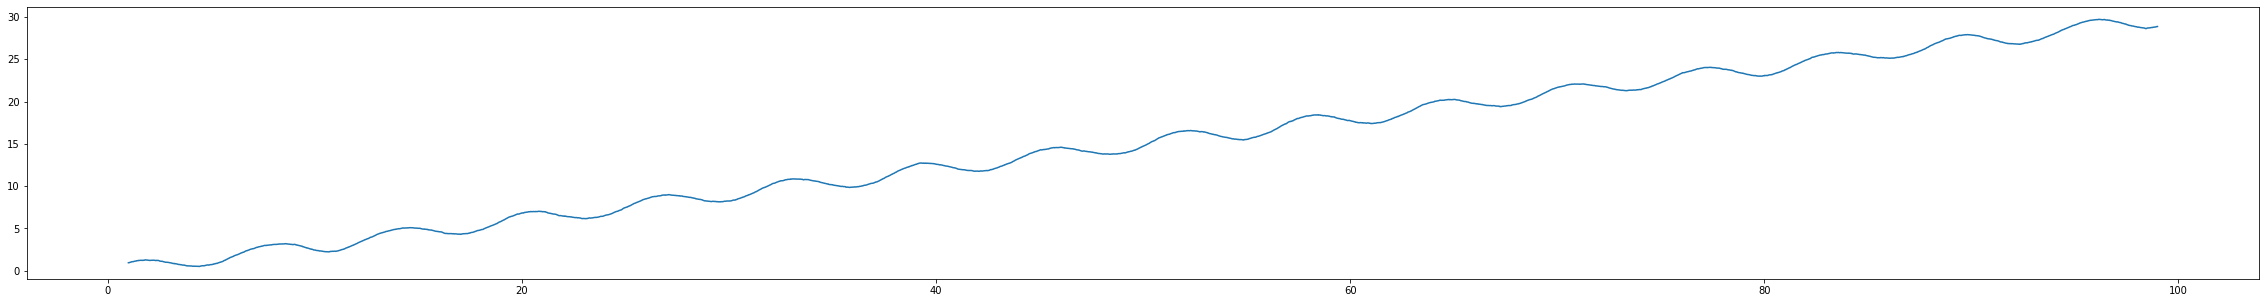

In [20]:
df_ma = df_sin.rolling(200).mean()

plt.figure(figsize= (40, 5))
plt.plot(df_ma['x'], df_ma['y'])

plt.show()

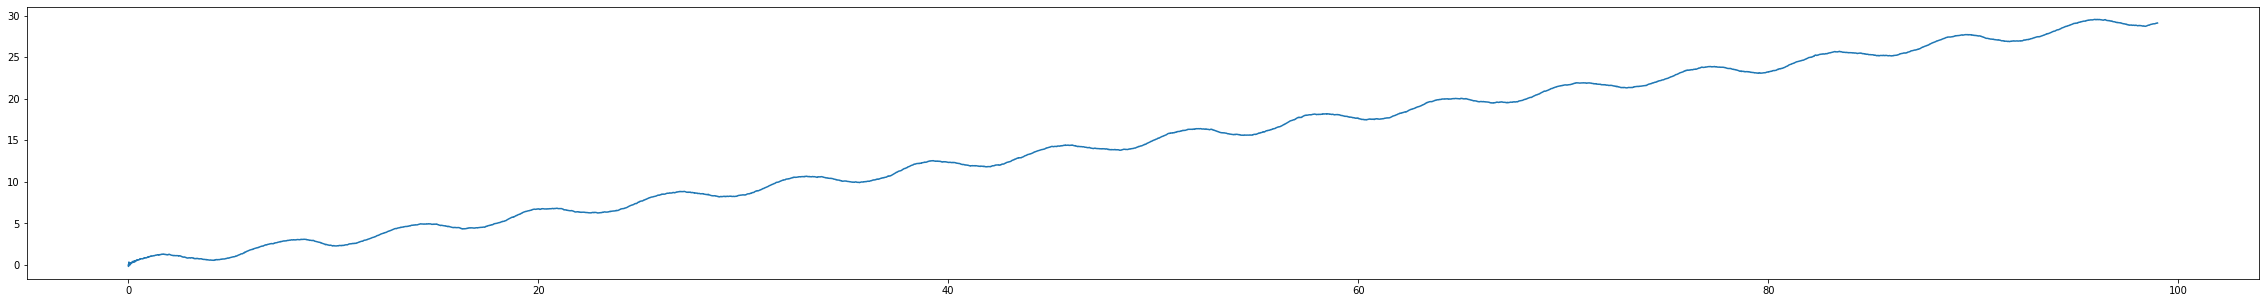

In [21]:
df_ewm = df_sin.ewm(span = 200).mean()

plt.figure(figsize= (40, 5))
plt.plot(df_ewm['x'], df_ewm['y'])

plt.show()

# 조회 및 요약

In [ ]:
# loc: 조건에 따라 indexing

cond = df_class['eng_score'] >= 60

df_class.loc[cond]

,date,student_id,eng_score,math_score,science_score
1,2020-01-01,1,65,21,25
2,2020-01-01,2,61,61,72
3,2020-01-01,3,89,91,23
4,2020-01-01,4,72,54,86
6,2020-01-01,6,63,63,1
7,2020-01-01,7,77,68,7
9,2020-01-02,1,62,83,48
13,2020-01-02,5,72,82,74
14,2020-01-02,6,64,89,29
15,2020-01-02,7,95,79,45


In [ ]:
# loc 중복조건

cond_1 = df_class['eng_score'] >= 60
cond_2 = df_class['math_score'] >= 60
df_class.loc[cond_1 & cond_2]

,date,student_id,eng_score,math_score,science_score
2,2020-01-01,2,61,61,72
3,2020-01-01,3,89,91,23
6,2020-01-01,6,63,63,1
7,2020-01-01,7,77,68,7
9,2020-01-02,1,62,83,48
13,2020-01-02,5,72,82,74
14,2020-01-02,6,64,89,29
15,2020-01-02,7,95,79,45
21,2020-01-03,5,67,99,82
22,2020-01-03,6,75,75,5


In [ ]:
df_class.loc[cond_1 | cond_2]

,date,student_id,eng_score,math_score,science_score
0,2020-01-01,0,40,63,84
1,2020-01-01,1,65,21,25
2,2020-01-01,2,61,61,72
3,2020-01-01,3,89,91,23
4,2020-01-01,4,72,54,86
6,2020-01-01,6,63,63,1
7,2020-01-01,7,77,68,7
8,2020-01-02,0,5,88,81
9,2020-01-02,1,62,83,48
13,2020-01-02,5,72,82,74


In [ ]:
# iloc: 범위로 indexing

df_class.iloc[ 15:20, :]

,date,student_id,eng_score,math_score,science_score
15,2020-01-02,7,95,79,45
16,2020-01-03,0,47,22,8
17,2020-01-03,1,12,44,60
18,2020-01-03,2,63,28,87
19,2020-01-03,3,23,95,59


In [ ]:
# query: 문자열 표현으로 indexing

str_expression = 'eng_score >= 60'
df_class.query(str_expression)

,date,student_id,eng_score,math_score,science_score
1,2020-01-01,1,65,21,25
2,2020-01-01,2,61,61,72
3,2020-01-01,3,89,91,23
4,2020-01-01,4,72,54,86
6,2020-01-01,6,63,63,1
7,2020-01-01,7,77,68,7
9,2020-01-02,1,62,83,48
13,2020-01-02,5,72,82,74
14,2020-01-02,6,64,89,29
15,2020-01-02,7,95,79,45


In [ ]:
# query: 문자열 표현으로 indexing

expr_1 = 'eng_score >= 60'
expr_2 = 'math_score >= 60'

cond = expr_1 + ' & ' + expr_2
df_class.query(cond)

,date,student_id,eng_score,math_score,science_score
2,2020-01-01,2,61,61,72
3,2020-01-01,3,89,91,23
6,2020-01-01,6,63,63,1
7,2020-01-01,7,77,68,7
9,2020-01-02,1,62,83,48
13,2020-01-02,5,72,82,74
14,2020-01-02,6,64,89,29
15,2020-01-02,7,95,79,45
21,2020-01-03,5,67,99,82
22,2020-01-03,6,75,75,5


In [ ]:
from tqdm import tqdm_notebook

In [ ]:
# 속도 체크
def speed_check(method):
  if method == 'loc':
    for i in tqdm_notebook(range(3000)):
      cond_1 = df_class['eng_score'] >= 60
      cond_2 = df_class['math_score'] >= 60
      df_class.loc[cond_1 & cond_2]
  elif method == 'query':
    for i in tqdm_notebook(range(3000)):
      expr_1 = 'eng_score >= 60'
      expr_2 = 'math_score >= 60'
      cond = expr_1 + ' & ' + expr_2 
      df_class.query(cond)
  else:
    ValueError('Unknown method')

In [ ]:
speed_check('loc')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
speed_check('query')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


In [ ]:
# 요약통계량 산출

df_class[['eng_score','math_score','science_score']].describe()

,eng_score,math_score,science_score
count,56.000000,56.000000,56.000000
mean,60.142857,67.142857,50.125000
std,25.171000,25.141367,27.864649
min,0.000000,21.000000,1.000000
25%,49.250000,44.000000,25.750000
50%,64.500000,72.000000,58.000000
75%,76.250000,89.500000,74.000000
max,96.000000,99.000000,94.000000


In [ ]:
print(f"eng_score sum: {df_class['eng_score'].sum()}")
print(f"eng_score mean: {df_class['eng_score'].mean()}")
print(f"eng_score std: {df_class['eng_score'].std()}")
print(f"eng_score max: {df_class['eng_score'].max()}")
print(f"eng_score min: {df_class['eng_score'].min()}")

eng_score sum: 3368
eng_score mean: 60.142857142857146
eng_score std: 25.17099959833182
eng_score max: 96
eng_score min: 0


In [ ]:
# 조회 및 요약

df_class.sort_values(by = ['date', 'eng_score']).head()

,date,student_id,eng_score,math_score,science_score
0,2020-01-01,0,40,63,84
5,2020-01-01,5,59,48,39
2,2020-01-01,2,61,61,72
6,2020-01-01,6,63,63,1
1,2020-01-01,1,65,21,25


In [ ]:
# 내림차순
df_class.sort_values(by = ['date', 'eng_score'], ascending= False).head()

,date,student_id,eng_score,math_score,science_score
50,2020-01-07,2,96,31,13
54,2020-01-07,6,75,81,26
52,2020-01-07,4,74,79,50
48,2020-01-07,0,72,41,60
55,2020-01-07,7,71,93,73


In [ ]:
# date는 오름차순, eng_Score는 내림차순
df_class.sort_values(by = ['date', 'eng_score'], ascending= [True, False]).head()

,date,student_id,eng_score,math_score,science_score
3,2020-01-01,3,89,91,23
7,2020-01-01,7,77,68,7
4,2020-01-01,4,72,54,86
1,2020-01-01,1,65,21,25
6,2020-01-01,6,63,63,1


In [ ]:
# groupby
df_class.groupby(['date']).agg('mean')

,eng_score,math_score,science_score
date,,,
2020-01-01,65.750,58.625,42.125
2020-01-02,54.500,66.250,55.125
2020-01-03,55.125,62.250,54.125
2020-01-04,63.375,64.750,33.875
2020-01-05,61.625,71.000,67.125
2020-01-06,56.125,77.750,54.500
2020-01-07,64.500,69.375,44.000


In [ ]:
# 평균을 이름 바꿔서
df_class.groupby(['date']).agg([('mean_!', 'mean')])

,eng_score,math_score,science_score
,mean_!,mean_!,mean_!
date,,,
2020-01-01,65.750,58.625,42.125
2020-01-02,54.500,66.250,55.125
2020-01-03,55.125,62.250,54.125
2020-01-04,63.375,64.750,33.875
2020-01-05,61.625,71.000,67.125
2020-01-06,56.125,77.750,54.500
2020-01-07,64.500,69.375,44.000


In [ ]:
# 복수의 요약통계량
df_class.groupby(['date']).agg(['mean','std'])

eng_score            math_score            science_score           
                mean        std       mean        std          mean        std
date                                                                          
2020-01-01    65.750  14.370108     58.625  19.747966        42.125  34.152756
2020-01-02    54.500  27.344365     66.250  25.387005        55.125  20.476031
2020-01-03    55.125  25.842587     62.250  32.247924        54.125  32.647194
2020-01-04    63.375  22.148444     64.750  27.587523        33.875  28.195428
2020-01-05    61.625  27.526286     71.000  28.025499        67.125  27.771710
2020-01-06    56.125  35.674871     77.750  22.549945        54.500  25.213375
2020-01-07    64.500  26.065851     69.375  23.832376        44.000  20.743329

In [ ]:
# 변수별 요약통계량
df_class.groupby(['date']).agg({'eng_score': 'mean', 'math_score':'std'})

,eng_score,math_score
date,,
2020-01-01,65.750,19.747966
2020-01-02,54.500,25.387005
2020-01-03,55.125,32.247924
2020-01-04,63.375,27.587523
2020-01-05,61.625,28.025499
2020-01-06,56.125,22.549945
2020-01-07,64.500,23.832376


In [ ]:
# 변수별 요약통계량 + 이름 지정
df_class.groupby(['date']).agg({'eng_score': [('mean', 'mean')], 'math_score': [('std','std')]})

,eng_score,math_score
,mean,std
date,,
2020-01-01,65.750,19.747966
2020-01-02,54.500,25.387005
2020-01-03,55.125,32.247924
2020-01-04,63.375,27.587523
2020-01-05,61.625,28.025499
2020-01-06,56.125,22.549945
2020-01-07,64.500,23.832376


In [ ]:
# as_index = False
df_class.groupby(['date'], as_index= False).agg({'eng_score': [('mean', 'mean')], 'math_score': [('std','std')]})

,date,eng_score,math_score
,,mean,std
0,2020-01-01,65.750,19.747966
1,2020-01-02,54.500,25.387005
2,2020-01-03,55.125,32.247924
3,2020-01-04,63.375,27.587523
4,2020-01-05,61.625,28.025499
5,2020-01-06,56.125,22.549945
6,2020-01-07,64.500,23.832376


# Series, DataFrame 연산

In [ ]:
# map

class_dict = {0: 'Angel',
 1: 'Angel',
 2: 'Beer',
 3: 'Beer',
 4: 'Carrot',
 5: 'Carrot',
 6: 'Despair',
 7: 'Despair'}

In [ ]:
df_class['student_id'] = df_class['student_id'].astype(int)

In [ ]:
df_class['student_id'].map(class_dict)

0       Angel
1       Angel
2        Beer
3        Beer
4      Carrot
5      Carrot
6     Despair
7     Despair
8       Angel
9       Angel
10       Beer
11       Beer
12     Carrot
13     Carrot
14    Despair
15    Despair
16      Angel
17      Angel
18       Beer
19       Beer
20     Carrot
21     Carrot
22    Despair
23    Despair
24      Angel
25      Angel
26       Beer
27       Beer
28     Carrot
29     Carrot
30    Despair
31    Despair
32      Angel
33      Angel
34       Beer
35       Beer
36     Carrot
37     Carrot
38    Despair
39    Despair
40      Angel
41      Angel
42       Beer
43       Beer
44     Carrot
45     Carrot
46    Despair
47    Despair
48      Angel
49      Angel
50       Beer
51       Beer
52     Carrot
53     Carrot
54    Despair
55    Despair
Name: student_id, dtype: object

In [ ]:
df_class['class'] = df_class['student_id'].map(class_dict)

In [ ]:
# function

def pf(score):
  if score >= 60:
    return 'Pass'
  else:
    return 'Fail'

In [ ]:
df_class['eng_score'].map(pf)

0     Fail
1     Pass
2     Pass
3     Pass
4     Pass
5     Fail
6     Pass
7     Pass
8     Fail
9     Pass
10    Fail
11    Fail
12    Fail
13    Pass
14    Pass
15    Pass
16    Fail
17    Fail
18    Pass
19    Fail
20    Pass
21    Pass
22    Pass
23    Pass
24    Fail
25    Fail
26    Pass
27    Fail
28    Fail
29    Pass
30    Pass
31    Pass
32    Fail
33    Pass
34    Fail
35    Pass
36    Pass
37    Fail
38    Pass
39    Pass
40    Fail
41    Fail
42    Pass
43    Pass
44    Pass
45    Fail
46    Pass
47    Pass
48    Pass
49    Fail
50    Pass
51    Fail
52    Pass
53    Pass
54    Pass
55    Pass
Name: eng_score, dtype: object

In [ ]:
def pf_total(eng_score, math_score):
  mean = (eng_score + math_score)/2
  if mean >= 80:
    result = 'A'
  elif mean >= 70:
    result = 'B'
  elif mean >= 60:
    result = 'C'
  else: 
    result = 'F'
  return result


df = df_class.copy()

df['result'] =  df.apply(lambda x: pf_total(x['eng_score'], x['math_score']), axis = 1)

df

,date,student_id,eng_score,math_score,science_score,class,result
0,2020-01-01,0,40,63,84,Angel,F
1,2020-01-01,1,65,21,25,Angel,F
2,2020-01-01,2,61,61,72,Beer,C
3,2020-01-01,3,89,91,23,Beer,A
4,2020-01-01,4,72,54,86,Carrot,C
5,2020-01-01,5,59,48,39,Carrot,F
6,2020-01-01,6,63,63,1,Despair,C
7,2020-01-01,7,77,68,7,Despair,B
8,2020-01-02,0,5,88,81,Angel,F
9,2020-01-02,1,62,83,48,Angel,B


# Numpy

# 자료 형태 및 기본 연산

In [ ]:
import numpy as np

In [ ]:
# array

np.array([0,1,2,3,4])

array([0, 1, 2, 3, 4])

In [ ]:
# 0이상 1000000 미만 자연수의 배열
data =  np.array(list(range(1000000)))

# 데이터 프레임으로 만듦
df = pd.DataFrame(data)
df_int8 = df.copy()
df_int16 = df.copy()
df_int64 = df.copy()

# 자료 형태 변경
df_int8[0] = df[0].astype(np.int8)
df_int16[0] = df[0].astype(np.int16)
df_int64[0] = df[0].astype(np.int64)

# 각 df별로 unique한 값의 개수
n_unique_value_origin = df[0].nunique()
n_unique_value_int8 = df_int8[0].nunique()
n_unique_value_int16 = df_int16[0].nunique()
n_unique_value_int64 = df_int64[0].nunique()

# print
print(f'nunique value of origin: {n_unique_value_origin} | memory usage: {list(df.memory_usage(index = False))[0]}')
print(f'nunique value of int8: {n_unique_value_int8}       | memory usage: {list(df_int8.memory_usage(index = False))[0]}')
print(f'nunique value of int16: {n_unique_value_int16}    | memory usage: {list(df_int16.memory_usage(index = False))[0]}')
print(f'nunique value of int64: {n_unique_value_int64}  | memory usage: {list(df_int64.memory_usage(index = False))[0]}')

nunique value of origin: 1000000 | memory usage: 8000000
nunique value of int8: 256       | memory usage: 1000000
nunique value of int16: 65536    | memory usage: 2000000
nunique value of int64: 1000000  | memory usage: 8000000


In [ ]:
df.iloc[70000:70010]

,0
70000,70000
70001,70001
70002,70002
70003,70003
70004,70004
70005,70005
70006,70006
70007,70007
70008,70008
70009,70009


In [ ]:
df_int8.iloc[70000:70010]

,0
70000,112
70001,113
70002,114
70003,115
70004,116
70005,117
70006,118
70007,119
70008,120
70009,121


In [ ]:
df_int16.iloc[70000:70010]

,0
70000,4464
70001,4465
70002,4466
70003,4467
70004,4468
70005,4469
70006,4470
70007,4471
70008,4472
70009,4473


In [ ]:
# 반올림
# 난수생성
array = np.random.normal(scale = 10, size = 10)
array

array([-10.05158913, -13.10757158,   4.71901684, -10.87505624,
        -2.8818461 ,   1.93506918, -11.66504562,  -0.72001046,
         6.75155007,   6.03806233])

In [ ]:
# 반올림    
np.round(array, decimals = 2)

array([-10.05, -13.11,   4.72, -10.88,  -2.88,   1.94, -11.67,  -0.72,
         6.75,   6.04])

In [ ]:
# 올림
np.ceil(array)

array([-10., -13.,   5., -10.,  -2.,   2., -11.,  -0.,   7.,   7.])

In [ ]:
# 버림
np.floor(array)

array([-11., -14.,   4., -11.,  -3.,   1., -12.,  -1.,   6.,   6.])

In [ ]:
# 정수부분 절삭
np.trunc(array)

array([-10., -13.,   4., -10.,  -2.,   1., -11.,  -0.,   6.,   6.])

In [ ]:
# 요약통계량
np.sum(array), np.std(array), np.mean(array)

(-29.857420704533023, 7.449262694922786, -2.9857420704533024)

In [ ]:
# 다차원 배열의 요약통계량
array_2 = np.random.normal(scale = 10, size = 20).reshape(4,5)
array_2 = np.ceil(array_2)
array_2

array([[  9.,   7.,  -3.,   4.,   5.],
       [ 12.,  14.,   5.,  14.,   3.],
       [ -5.,  -0.,  -4.,   3.,  -2.],
       [  2.,  -8., -10.,   9.,  -7.]])

In [ ]:

# 세로축 합
np.sum(array_2, axis = 0)

array([ 18.,  13., -12.,  30.,  -1.])

In [ ]:
# 가로축 합
np.sum(array_2, axis = 1)

array([ 22.,  48.,  -8., -14.])

In [ ]:
# 다차원 배열의 요약통계량
array_3 = np.random.normal(scale = 10, size = 30).reshape(2,3,5)
array_3 = np.ceil(array_3)
array_3

array([[[ 11., -18.,  -4.,   2., -23.],
        [ 16.,  -6., -27.,  -9., -10.],
        [  7.,  -4.,  -3.,  19.,  21.]],

       [[  9.,  -2.,   8.,  -8.,  -0.],
        [  7.,  12., -21.,   1.,   4.],
        [  1.,  -7.,  -4.,  18.,   2.]]])

In [ ]:
# axis = 0
np.sum(array_3, axis = 0)

array([[ 20., -20.,   4.,  -6., -23.],
       [ 23.,   6., -48.,  -8.,  -6.],
       [  8., -11.,  -7.,  37.,  23.]])

In [ ]:
# axis = 1
np.sum(array_3, axis = 1)

array([[ 34., -28., -34.,  12., -12.],
       [ 17.,   3., -17.,  11.,   6.]])

In [ ]:
# axis = 2
np.sum(array_3, axis = 2)

array([[-32., -36.,  40.],
       [  7.,   3.,  10.]])

In [ ]:
# 데이터 생성
time = dttm.datetime(year = 2020, month = 8, day = 18, hour = 0)
time = [time + dttm.timedelta(hours = i) for i in range(24)]

precip_1 = np.random.randint(0, 3, size = 12)
precip_2 = np.random.randint(-1, 3, size = 12)
precip = np.concatenate((precip_1, precip_2))
precip = np.cumsum(np.cumsum(precip))

df_precip = pd.DataFrame({'timestamp': time,'누적강수량':precip})
df_precip

,timestamp,누적강수량
0,2020-08-18 00:00:00,1
1,2020-08-18 01:00:00,2
2,2020-08-18 02:00:00,3
3,2020-08-18 03:00:00,4
4,2020-08-18 04:00:00,6
5,2020-08-18 05:00:00,8
6,2020-08-18 06:00:00,12
7,2020-08-18 07:00:00,17
8,2020-08-18 08:00:00,22
9,2020-08-18 09:00:00,27


In [ ]:
# 차분
np.diff(df_precip['누적강수량'], n =1)

array([1, 1, 1, 2, 2, 4, 5, 5, 5, 6, 7, 6, 5, 4, 5, 5, 4, 5, 5, 6, 7, 7,
       7])

In [ ]:
# df에 시간당 강수량 삽입
df_precip['강수량(시간당)'] = np.concatenate((np.array([0]) , np.diff(df_precip['누적강수량'], n =1 )), axis = 0)
df_precip

,timestamp,누적강수량,강수량(시간당)
0,2020-08-18 00:00:00,1,0
1,2020-08-18 01:00:00,2,1
2,2020-08-18 02:00:00,3,1
3,2020-08-18 03:00:00,4,1
4,2020-08-18 04:00:00,6,2
5,2020-08-18 05:00:00,8,2
6,2020-08-18 06:00:00,12,4
7,2020-08-18 07:00:00,17,5
8,2020-08-18 08:00:00,22,5
9,2020-08-18 09:00:00,27,5


In [ ]:
# gradient
df_precip['강수량(변화율)'] =  np.gradient(df_precip['강수량(시간당)'])
df_precip

,timestamp,누적강수량,강수량(시간당),강수량(변화율)
0,2020-08-18 00:00:00,1,0,1.0
1,2020-08-18 01:00:00,2,1,0.5
2,2020-08-18 02:00:00,3,1,0.0
3,2020-08-18 03:00:00,4,1,0.5
4,2020-08-18 04:00:00,6,2,0.5
5,2020-08-18 05:00:00,8,2,1.0
6,2020-08-18 06:00:00,12,4,1.5
7,2020-08-18 07:00:00,17,5,0.5
8,2020-08-18 08:00:00,22,5,0.0
9,2020-08-18 09:00:00,27,5,0.5


In [ ]:
# log & exp

array = np.random.randint(0,10, size = 10)
array

array([1, 1, 6, 8, 4, 2, 4, 0, 8, 2])

In [ ]:
array_log  = np.log(array)
array_log

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([0.        , 0.        , 1.79175947, 2.07944154, 1.38629436,
       0.69314718, 1.38629436,       -inf, 2.07944154, 0.69314718])

In [ ]:
array_exp = np.exp(array_log)
array_exp

array([1., 1., 6., 8., 4., 2., 4., 0., 8., 2.])

In [ ]:
# 만약 0이 있다면?
array_new = np.concatenate((np.array([0]), array ))
np.log(array_new)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


array([      -inf, 0.        , 0.        , 1.79175947, 2.07944154,
       1.38629436, 0.69314718, 1.38629436,       -inf, 2.07944154,
       0.69314718])

In [ ]:
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


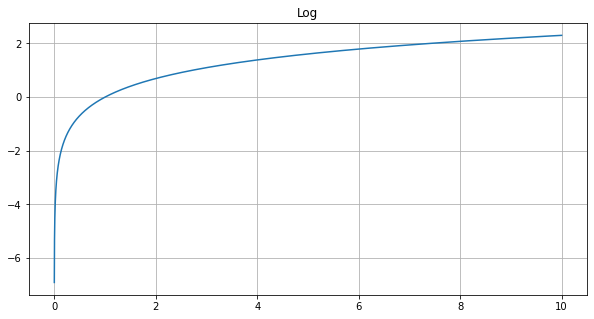

In [ ]:
a = np.array(list(range(10000))) / 1000
plt.figure(figsize=  (10,5))
plt.plot(a, np.log(a))
plt.grid()
plt.title('Log')
plt.show()

In [ ]:
# log1p & expm1
array_new_log = np.log1p(array_new)
array_new_log

array([0.        , 0.69314718, 0.69314718, 1.94591015, 2.19722458,
       1.60943791, 1.09861229, 1.60943791, 0.        , 2.19722458,
       1.09861229])

In [ ]:
np.expm1(array_new_log)

array([0., 1., 1., 6., 8., 4., 2., 4., 0., 8., 2.])

In [ ]:
np.sin(array_new)

array([ 0.        ,  0.84147098,  0.84147098, -0.2794155 ,  0.98935825,
       -0.7568025 ,  0.90929743, -0.7568025 ,  0.        ,  0.98935825,
        0.90929743])

In [ ]:
np.cos(array_new)

array([ 1.        ,  0.54030231,  0.54030231,  0.96017029, -0.14550003,
       -0.65364362, -0.41614684, -0.65364362,  1.        , -0.14550003,
       -0.41614684])

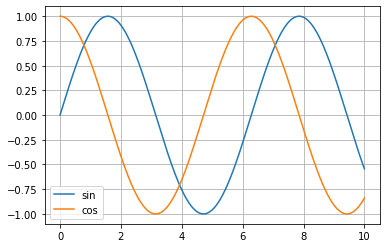

In [ ]:
plt.plot(a, np.sin(a))
plt.plot(a, np.cos(a))
plt.legend(['sin','cos'])
plt.grid()
plt.show()

# NA 처리

In [ ]:
df = pd.DataFrame({'student_id': [0,1,2,3,4,5,6,7],
              'eng_score': [47, 64,  8, 67, 13, None, None, np.inf],
              'math_score':[92, 96, 34, np.nan, 53, None, 15, np.nan]
              })

In [ ]:
df

,student_id,eng_score,math_score
0,0,47.0,92.0
1,1,64.0,96.0
2,2,8.0,34.0
3,3,67.0,NaN
4,4,13.0,53.0
5,5,NaN,NaN
6,6,NaN,15.0
7,7,inf,NaN


In [ ]:
# na filtering
cond = df['eng_score'].apply(lambda x: np.isnan(x))
df[cond]

,student_id,eng_score,math_score
5,5,NaN,NaN
6,6,NaN,15.0


In [ ]:
# inf이거나 nan인 자료
cond = df['eng_score'].apply(lambda x: np.isinf(x) + np.isnan(x))

df[cond]

,student_id,eng_score,math_score
5,5,NaN,NaN
6,6,NaN,15.0
7,7,inf,NaN


# Indexing & Sorting

In [ ]:
# array에서 가장 큰 값 찾기
array_new

array([0, 1, 1, 6, 8, 4, 2, 4, 0, 8, 2])

In [ ]:
np.argmax(array_new)

4

In [ ]:
array_new[np.argmax(array_new)]

8

In [ ]:
# 데이터 프레임에 적용
df_class_summarized = df_class.groupby(['date','class'], as_index = False)[['eng_score','math_score','science_score']].mean()

In [ ]:
df_class_summarized

,date,class,eng_score,math_score,science_score
0,2020-01-01,Angel,52.5,42.0,54.5
1,2020-01-01,Beer,75.0,76.0,47.5
2,2020-01-01,Carrot,65.5,51.0,62.5
3,2020-01-01,Despair,70.0,65.5,4.0
4,2020-01-02,Angel,33.5,85.5,64.5
5,2020-01-02,Beer,39.5,31.5,67.5
6,2020-01-02,Carrot,65.5,64.0,51.5
7,2020-01-02,Despair,79.5,84.0,37.0
8,2020-01-03,Angel,29.5,33.0,34.0
9,2020-01-03,Beer,43.0,61.5,73.0


In [ ]:
index = np.argmax(df_class_summarized['math_score'])

In [ ]:
df_class_summarized.iloc[index, :]

date             2020-01-06 00:00:00
class                        Despair
eng_score                       71.5
math_score                        95
science_score                     78
Name: 23, dtype: object

In [ ]:
df_class_summarized[df_class_summarized['math_score'] == df_class_summarized['math_score'].max()]

,date,class,eng_score,math_score,science_score
23,2020-01-06,Despair,71.5,95.0,78.0


In [ ]:
array_new

array([0, 1, 1, 6, 8, 4, 2, 4, 0, 8, 2])

In [ ]:
# argsort
# 가장 작은 값 부터 순서대로 index를 반환 
np.argsort(array_new)

array([ 0,  8,  1,  2,  6, 10,  5,  7,  3,  4,  9])

In [ ]:
# 해당 index 대로 정렬
array_new[np.argsort(array_new) ]

array([0, 0, 1, 1, 2, 2, 4, 4, 6, 8, 8])

# pyplot & seaborn 기초시각화

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize= (10,5))
sns.set(rc={'figure.figsize':(10,5)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 720x360 with 0 Axes>

In [ ]:
# 데이터 셋 로드
iris = sns.load_dataset("iris") 
titanic = sns.load_dataset("titanic")  

In [ ]:
# Sepal Length:	꽃받침의 길이
# Sepal Width:	꽃받침의 너비
# Petal Length: 꽃잎의 길이
# Petal Width:	꽃잎의 너비  
# Species:  setosa / versicolor / virginica

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


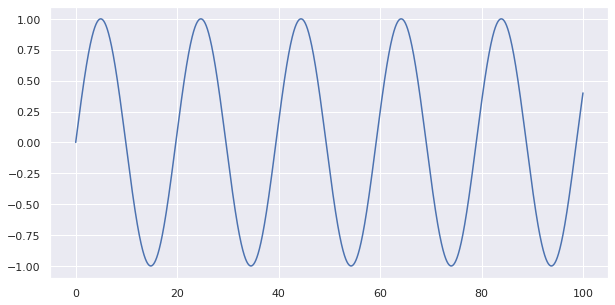

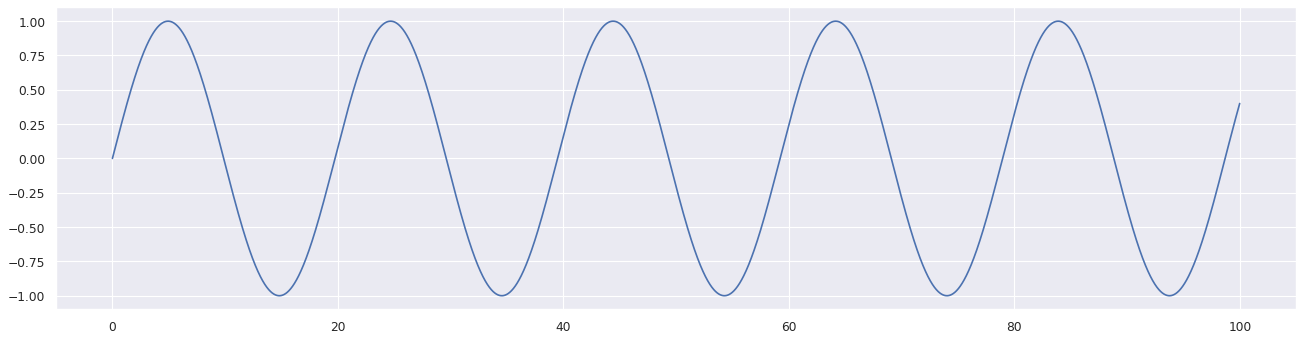

In [ ]:
# plot size 설정

a = np.array(list(range(10000))) * 0.01

sin_a = np.sin(a / np.pi)

w = np.ceil(a/100)

plt.plot(a, sin_a )
plt.show()

plt.figure(figsize = (20,5), dpi = 80)
plt.plot(a, sin_a)
plt.show()

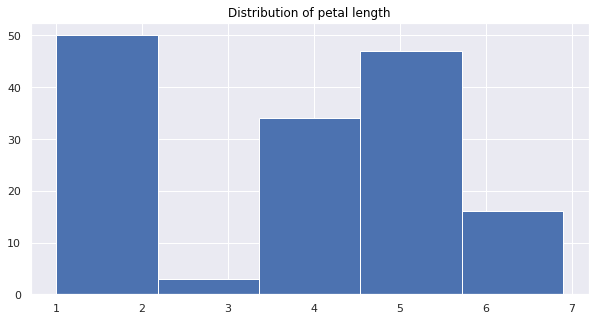

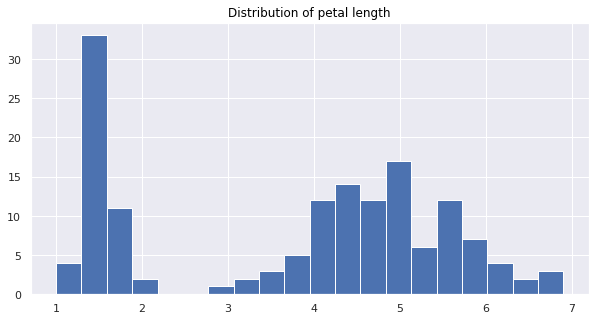

In [ ]:
# Histogram
# bins: 구간의 개수
plt.hist(iris['petal_length'], bins = 5)
plt.title('Distribution of petal length', color = 'black')
plt.show()

plt.hist(iris['petal_length'], bins = 20)
plt.title('Distribution of petal length', color = 'black')
plt.show()

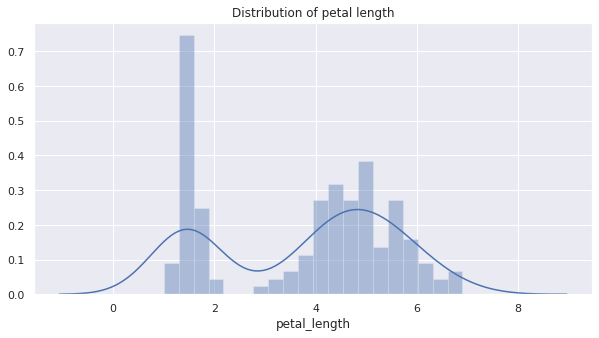

In [ ]:
# Density plot
sns.distplot(iris['petal_length'], kde = True, hist_kws= {'linewidth':0.5}, bins = 20)
plt.title('Distribution of petal length')
plt.show()

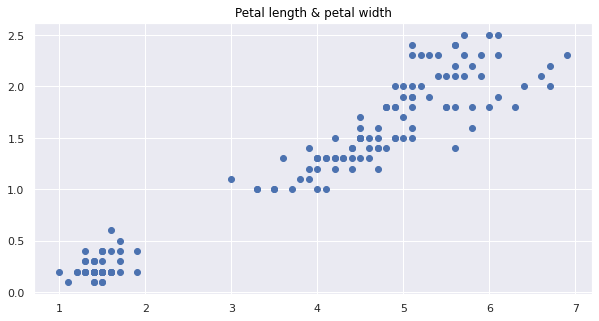

In [ ]:
# scatter plot

plt.scatter(iris['petal_length'], iris['petal_width'])
plt.title('Petal length & petal width', color = 'black')
plt.show()

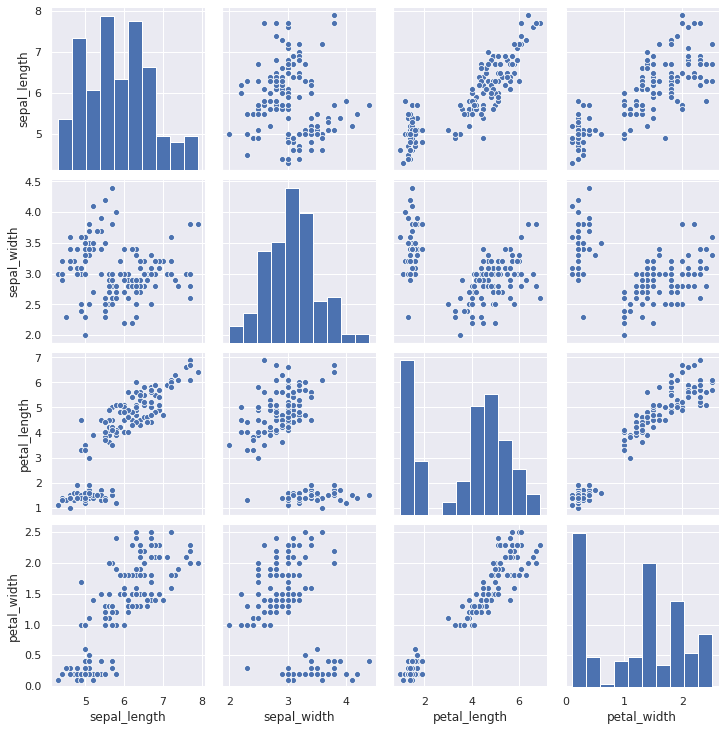

In [ ]:
# pair plot
# numeric 변수의 분포 및 관계 개괄적 파악
# hue: group으로 지정할 변수 

sns.pairplot(iris)
plt.show()

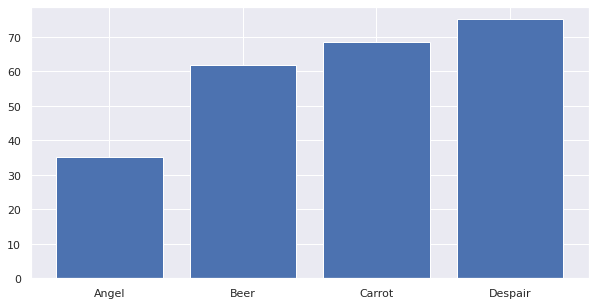

In [ ]:
# bar plot 
df_class_summarized = df_class.drop(['student_id'], axis=1).groupby(['class'], as_index=False).mean() 
plt.bar(df_class_summarized['class'], df_class_summarized['eng_score'])
plt.show()

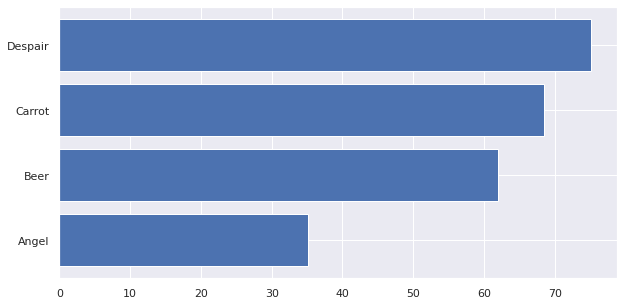

In [ ]:
plt.barh(df_class_summarized['class'], df_class_summarized['eng_score'])
plt.show()

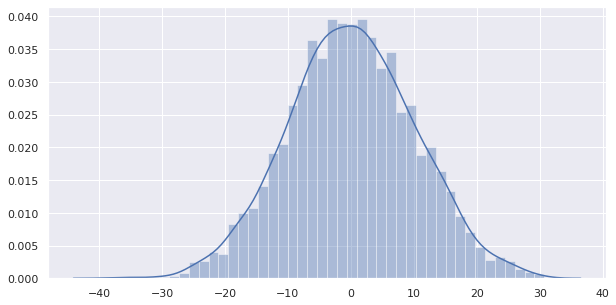

In [ ]:
# box plot

dist = np.random.normal(scale= 10, size = 5000)

sns.distplot(dist, kde = True)

In [ ]:
q1 = np.percentile(dist, 25)
q3 = np.percentile(dist, 75)
median =  np.percentile(dist, 50)

iqr = q3 - q1

maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

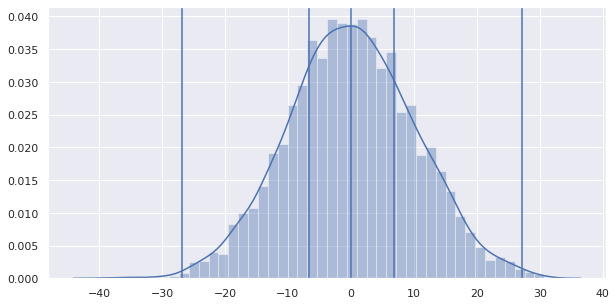

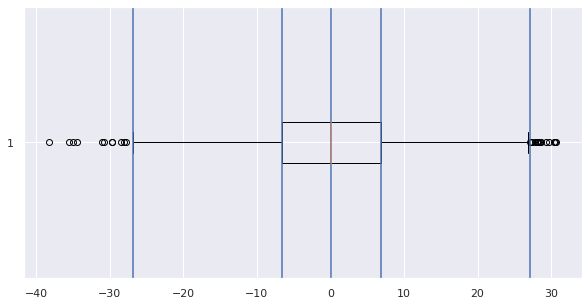

In [ ]:
plt.figure(figsize = (10,5))

sns.distplot(dist, kde = True)
plt.axvline(q1)
plt.axvline(q3)
plt.axvline(median)
plt.axvline(maximum)
plt.axvline(minimum)
plt.show()
plt.boxplot(dist, vert = 0)
plt.axvline(q1)
plt.axvline(q3)
plt.axvline(median)
plt.axvline(maximum)
plt.axvline(minimum)
plt.show()

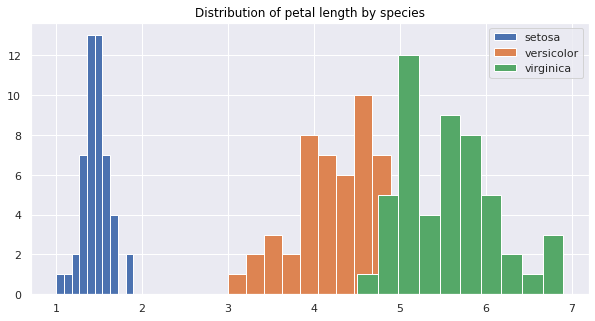

In [ ]:
# Histogram
# bins: 구간의 개수
grouped_iris = iris.groupby(['species'])

legend = []

for name, group in grouped_iris:
  legend.append(name)
  plt.hist(group['petal_length'])

plt.legend(legend)
plt.title('Distribution of petal length by species', color = 'black')
plt.show()

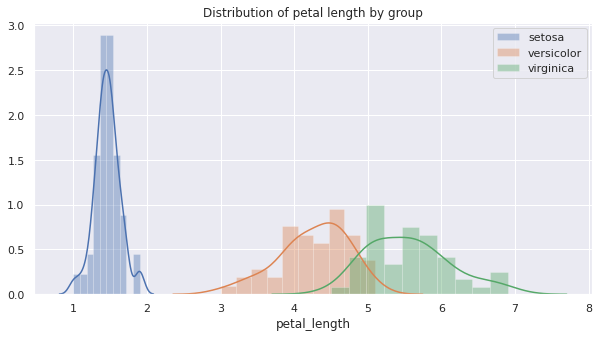

In [ ]:
# Density plot

legend = []

for name, group in grouped_iris:
  sns.distplot(group['petal_length'], kde = True, hist_kws= {'linewidth':0.5}, bins = 10)
  legend.append(name)

plt.legend(legend)
plt.title('Distribution of petal length by group')
plt.show()

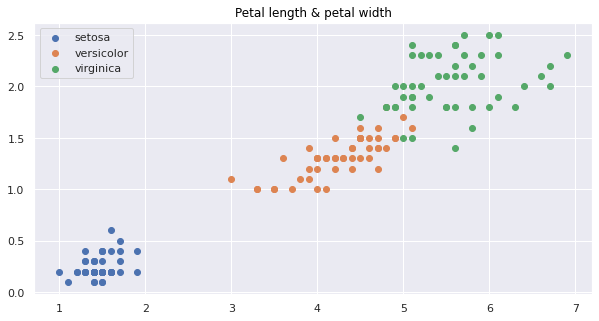

In [ ]:
# scatter plot

legend = []
for name, group in grouped_iris:
  plt.scatter(group['petal_length'], group['petal_width'])
  legend.append(name)

plt.legend(legend)
plt.title('Petal length & petal width', color = 'black')
plt.show()

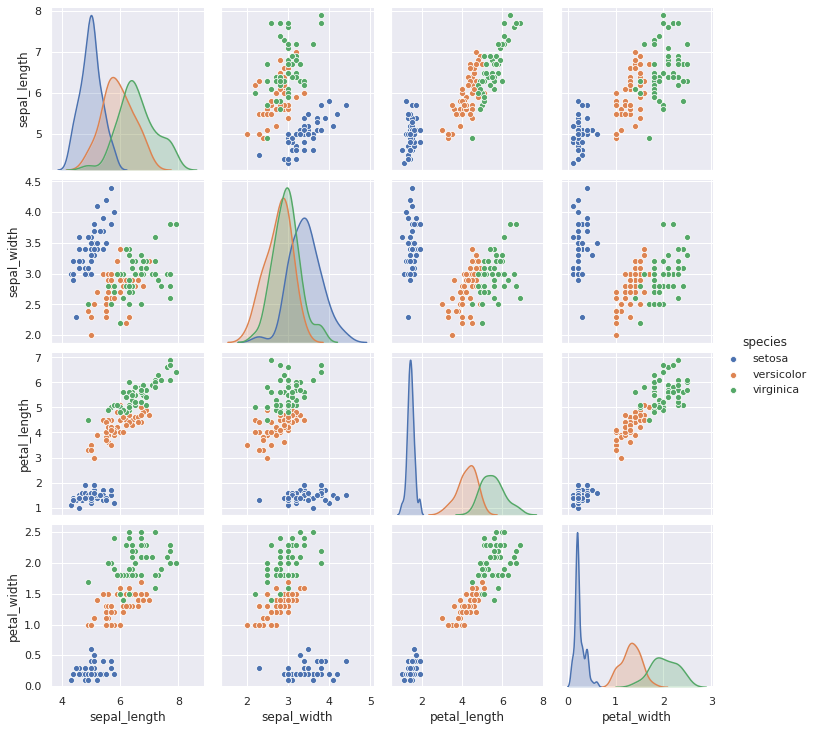

In [ ]:
# pair plot
# numeric 변수의 분포 및 관계 개괄적 파악
# hue: group으로 지정할 변수 

sns.pairplot(iris, hue = 'species')
plt.show()

In [ ]:
dictionary = {}

for id in df_class['student_id'].unique():
  if id % 2 == 0:
    dictionary[id] = 'male'
  else:
    dictionary[id] = 'female'

df_class['sex'] = df_class['student_id'].map(dictionary)

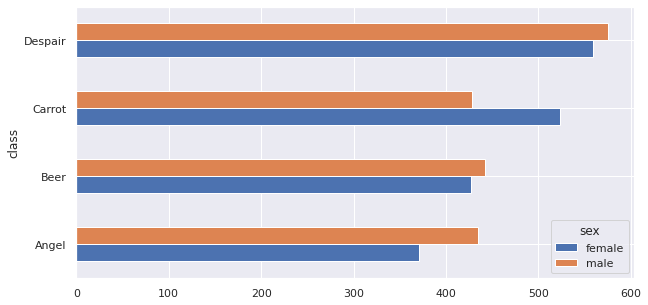

In [ ]:
df_class.groupby(['class','sex'])['math_score'].sum().unstack().plot(kind = 'barh', stacked = False)

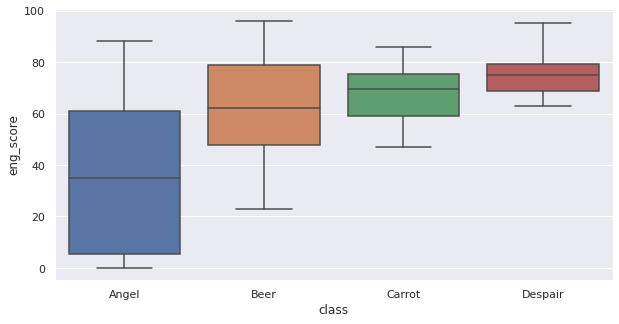

In [ ]:
# box plot

sns.boxplot(x = 'class', y = 'eng_score', data = df_class)

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

# Class

In [ ]:
# pacman class 선언
class Pacman(object):
  ''' do something'''

In [ ]:
# 속성과 method 지정

class Pacman(object):
  self.color = 'orange'
  self.shape = 'Circle'
  self.life = 3
  self.location = (0,0)

  def move(direction):
    x, y = self.location
    if direction == 'up':
      y += 1
    elif direction == 'down':
      y -= 1
    elif direction == 'left':
      x -= 1
    elif direction == 'right':
      x += 1
    else:
      ValueError('Unknown Direction')
    self.location = (x, y)


NameError: ignored

In [ ]:
# constructor


class Pacman(object):
  def __init__(self, color, shape):
    self.color = 'orange'
    self.shape = 'Circle'
    self.life = 3
    self.location = (0,0)

  def move(self, direction):
    x, y = self.location
    if direction == 'up':
      y += 1
    elif direction == 'down':
      y -= 1
    elif direction == 'left':
      x -= 1
    elif direction == 'right':
      x += 1
    else:
      ValueError('Unknown Direction')
    self.location = (x, y)


In [ ]:
class Pacman(object):
  def __init__(color, shape):
    self.color = color
    self.shape = shape
    self.life = 3
    self.location = (0,0)
  def move(direction):
    x, y = self.location
    if direction == 'up':
      y += 1
    elif direction == 'down':
      y -= 1
    elif direction == 'left':
      x -= 1
    elif direction == 'right':
      x += 1
    else:
      ValueError('Unknown Direction')
    self.location = (x, y)


In [ ]:
# 만약 class를 사용하지 않는다면 ?

# move 함수
def move(direction, pacman):
  x, y = pacman['location']
  if direction == 'up':
    y += 1
  elif direction == 'down':
    y -= 1
  elif direction == 'left':
    x -= 1
  elif direction == 'right':
    x += 1
  else:
    ValueError('Unknown Direction')
  return (x, y)

# pacman1 dict
pacman1 = {}

# set attribute for pacman1
pacman1['color'] = 'orange'
pacman1['shape'] = 'circle'
pacman1['location'] = (0,0)

# set method for pacman1
pacman1['move'] = move

# pacman2 dict
pacman2 = {}

# set attribute for pacman2
pacman2['color'] = 'orange'
pacman2['shape'] = 'circle'
pacman2['location'] = (0,0)

# set method for pacman2
pacman2['move'] = move

In [ ]:
class Pacman(object):
  def __init__(self, color, shape):
    self.color = color
    self.shape = shape
    self.life = 3
    self.location = (0,0)
  def move(self, direction):
    x, y = self.location
    if direction == 'up':
      y += 1
    elif direction == 'down':
      y -= 1
    elif direction == 'left':
      x -= 1
    elif direction == 'right':
      x += 1
    else:
      ValueError('Unknown Direction')
    self.location = (x, y)

pacman1 = Pacman(color = 'orange', shape ='circle')
pacman2 = Pacman(color = 'red', shape ='circle')


In [ ]:
pacman1.move('up')

In [ ]:
pacman1.location, pacman2.location

((0, 1), (0, 0))

In [ ]:
class pacman_upgraded(Pacman):
  def __init__(self, color, shape):
    super().__init__(color, shape)
    self.life = 30
  def move(self, direction, amount):
    x, y = self.location
    if direction == 'up':
      y += amount
    elif direction == 'down':
      y -= amount
    elif direction == 'left':
      x -= amount
    elif direction == 'right':
      x += amount
    else:
      ValueError('Unknown Direction')
    self.location = (x, y)

In [ ]:
pacman3 = pacman_upgraded(color = 'pink', shape ='6point_star')

In [ ]:
pacman3.move('up', 4)

In [ ]:
pacman3.location

(0, 4)

In [ ]:
class Pacman(object):
  def __init__(self, color, shape):
    self.color = color
    self.shape = shape
    self.life = 3
    self.location = (0,0)
  def move(self, direction):
    x, y = self.location
    if direction == 'up':
      y += 1
    elif direction == 'down':
      y -= 1
    elif direction == 'left':
      x -= 1
    elif direction == 'right':
      x += 1
    else:
      ValueError('Unknown Direction')
    self.location = (x, y)

In [ ]:
from pacman import Pacman

ModuleNotFoundError: ignored

In [ ]:
pacmna1 = Pacman(color = 'green', shape = 'star')

In [ ]:
import sys

In [ ]:
sys.path

In [ ]:
# /usr/local/lib/python3.6

In [ ]:
building_id = list(range(1449))
meter = list(range(4))
timestamp = dttm.datetime(year = 2018, month = 1, day = 1 ,hour = 0, minute = 0)

In [ ]:
tqdm